In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import cv2
import numpy as np
import os
import h5py
import pandas as pd
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from lib_file import lib_path

In [3]:
train=pd.read_csv('train_new.csv')

In [4]:
train.head()

,image,class
0,abnormal_frame0.jpg,abnormal
1,abnormal_frame10020.jpg,abnormal
2,abnormal_frame10050.jpg,abnormal
3,abnormal_frame10080.jpg,abnormal
4,abnormal_frame10110.jpg,abnormal


In [5]:
train_image = []

for i in range(train.shape[0]):
    img = image.load_img('train_data/'+train['image'][i], target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

In [6]:
len(X)

3070

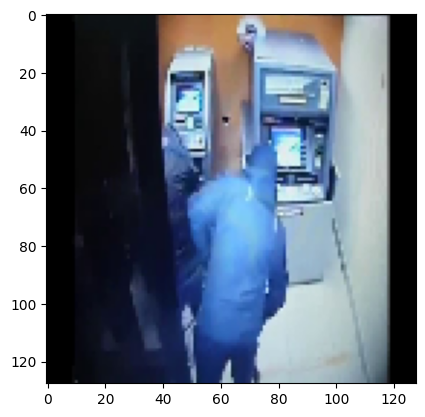

In [7]:
plt.imshow(X[9])

In [8]:
y=train['class']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [11]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [12]:
y_train.head()

,abnormal,normal
367,1,0
859,1,0
2330,0,1
1091,1,0
2114,1,0


In [13]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2456, 128, 128, 3) (2456, 2) (614, 128, 128, 3) (614, 2)


In [14]:
# normalize data
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

x_train /= 127.5
x_test /= 127.5

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(64, (3, 3),activation='relu', padding='same', input_shape=(128,128,3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [17]:
model.compile(
    loss= 'binary_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0

In [19]:
number_of_epochs=10

In [20]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=number_of_epochs,
    validation_data=(X_test, y_test),
    shuffle=True
)

Epoch 1/10
20/20 [==============================] - 46s 2s/step - loss: 0.8561 - accuracy: 0.5672 - val_loss: 0.6756 - val_accuracy: 0.7231
Epoch 2/10
20/20 [==============================] - 39s 2s/step - loss: 0.6234 - accuracy: 0.7020 - val_loss: 0.6615 - val_accuracy: 0.7231
Epoch 3/10
20/20 [==============================] - 38s 2s/step - loss: 0.5906 - accuracy: 0.7024 - val_loss: 0.6145 - val_accuracy: 0.7231
Epoch 4/10
20/20 [==============================] - 40s 2s/step - loss: 0.5048 - accuracy: 0.7476 - val_loss: 0.5061 - val_accuracy: 0.8795
Epoch 5/10
20/20 [==============================] - 41s 2s/step - loss: 0.4319 - accuracy: 0.8147 - val_loss: 0.4603 - val_accuracy: 0.9153
Epoch 6/10
20/20 [==============================] - 38s 2s/step - loss: 0.3485 - accuracy: 0.8587 - val_loss: 0.3000 - val_accuracy: 0.9349
Epoch 7/10
20/20 [==============================] - 38s 2s/step - loss: 0.2481 - accuracy: 0.8815 - val_loss: 0.1956 - val_accuracy: 0.9381
Epoch 8/10
20/20 [==

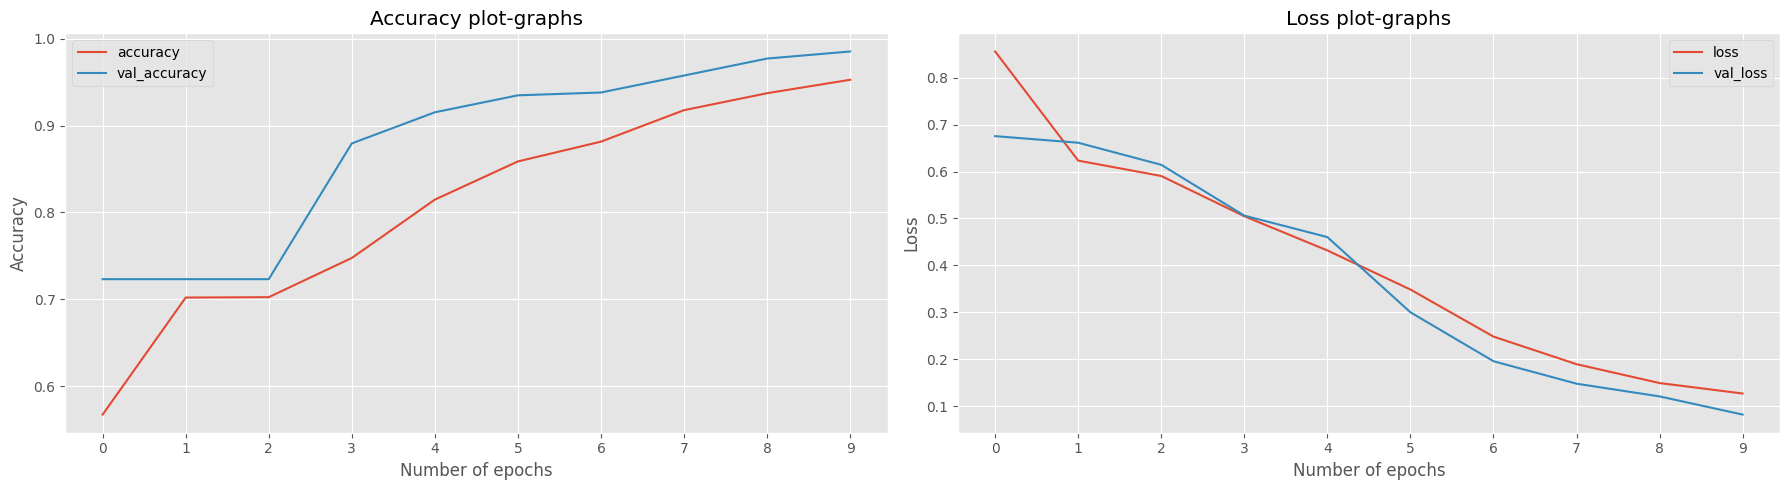

In [21]:
with plt.style.context(style='ggplot'):
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
    axes[0].plot(history.history["accuracy"],label="accuracy")
    axes[0].plot(history.history["val_accuracy"],label="val_accuracy")
    axes[0].set_title(label='Accuracy plot-graphs')
    axes[0].set_xlabel(xlabel='Number of epochs')
    axes[0].set_ylabel(ylabel='Accuracy')
    axes[0].set_xticks(range(number_of_epochs))
    axes[0].legend()
    axes[1].plot(history.history["loss"],label="loss")
    axes[1].plot(history.history["val_loss"],label="val_loss")
    axes[1].set_title(label='Loss plot-graphs')
    axes[1].set_xlabel(xlabel='Number of epochs')
    axes[1].set_ylabel(ylabel='Loss')
    axes[1].set_xticks(range(number_of_epochs))
    axes[1].legend()
    fig.tight_layout()
    plt.show()

In [22]:
y_pred = model.predict(X_test, batch_size=10, verbose=0)

In [23]:
y_pred

array([[9.9895442e-01, 6.5749884e-04],
       [3.2843697e-01, 6.6237468e-01],
       [5.4433548e-01, 4.7012073e-01],
       ...,
       [9.9285364e-01, 7.6471269e-03],
       [5.9810281e-04, 9.9950087e-01],
       [9.9903107e-01, 6.0167909e-04]], dtype=float32)

In [24]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

614

In [25]:
y_test

,abnormal,normal
1446,1,0
2595,0,1
1644,1,0
194,1,0
240,1,0
...,...,...
2428,0,1
1477,1,0
1302,1,0
2290,0,1


In [26]:
y_true = []
y_test1 = np.array(y_test)
for i in range(0, len(y_test1)):
    y_true.append(int(np.argmax(y_test1[i])))
len(y_true)

614

In [27]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=45)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [28]:
class_names =['abnormal', 'normal']

In [29]:
cm_plot_labels = class_names

In [30]:
l=len(y_true)
for i in range(l):
    print(y_true[i],'----',y_predict[i])

0 ---- 0
1 ---- 1
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
1 ---- 1
1 ---- 1
1 ---- 1
1 ---- 1
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
1 ---- 1
1 ---- 1
1 ---- 1
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
1 ---- 1
1 ---- 1
1 ---- 1
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
1 ---- 1
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
1 ---- 1
1 ---- 1
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
1 ---- 1
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
0 ---- 0
0

In [31]:
print(classification_report(y_true=y_true,y_pred=y_predict,target_names=class_names))

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99       444
      normal       0.98      0.97      0.97       170

    accuracy                           0.99       614
   macro avg       0.98      0.98      0.98       614
weighted avg       0.99      0.99      0.99       614



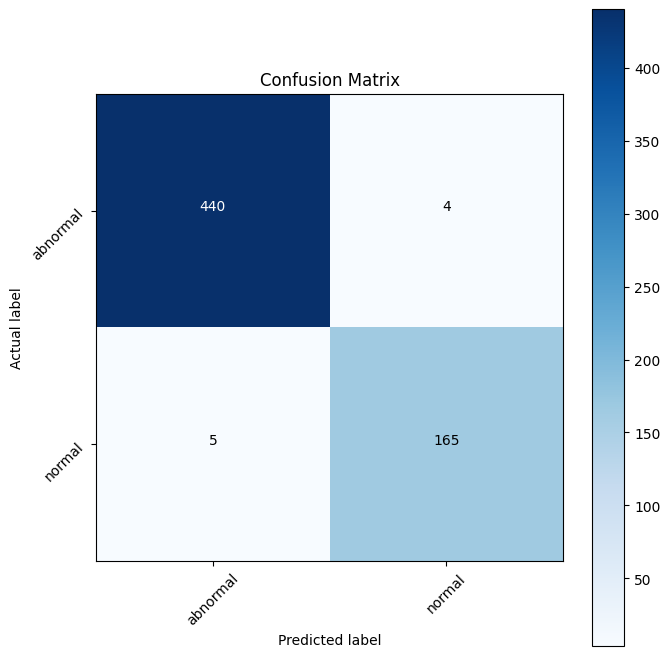

In [32]:
# to plot confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=y_predict)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [33]:
acc_rf = accuracy_score(y_true=y_true, y_pred= y_predict)
print("Overall accuracy of CNN model using test-set is : %f" %(acc_rf*100))

Overall accuracy of CNN model using test-set is : 98.534202


In [34]:
from pathlib import Path

In [35]:
model_structure = model.to_json()
f = Path("model/model_structure.json")
f.write_text(model_structure)

4174

In [36]:
model.save_weights("model/model_weights.h5")

# Thank You !